Objective: Implementation of Decision Tree

NAME: GAUTHAM P HARISH

REGNO: 21BCE5382

In [ ]:
Dataset Description:
This dataset is related to red variants of the Portuguese "Vinho Verde" wine. The dataset provides information about the amount of various chemicals present in wine and their effect on its quality. The datasets can be viewed as either classification or regression tasks. It's important to note that the classes are ordered and not balanced, meaning there are more normal wines than excellent or poor ones. The task is to predict the quality of wine using the given data.

This project is both simple and challenging, requiring the anticipation of wine quality. The complexity arises from the dataset having fewer samples and being highly imbalanced. The goal is to overcome these obstacles and build a good predictive model for wine quality classification.

Data Frame Columns:
Input variables (based on physicochemical tests):

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol
Output variable (based on sensory data):
12. quality (score between 0 and 10)



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [28]:

data=pd.read_csv("winequality-red.csv")
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

# Exploratory Data Analysis

In [29]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [30]:
data.describe().transpose()

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [31]:
data.duplicated().sum()

240

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [33]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
data.quality.value_counts().head()

quality
5    681
6    638
7    199
4     53
8     18
Name: count, dtype: int64

<Axes: >

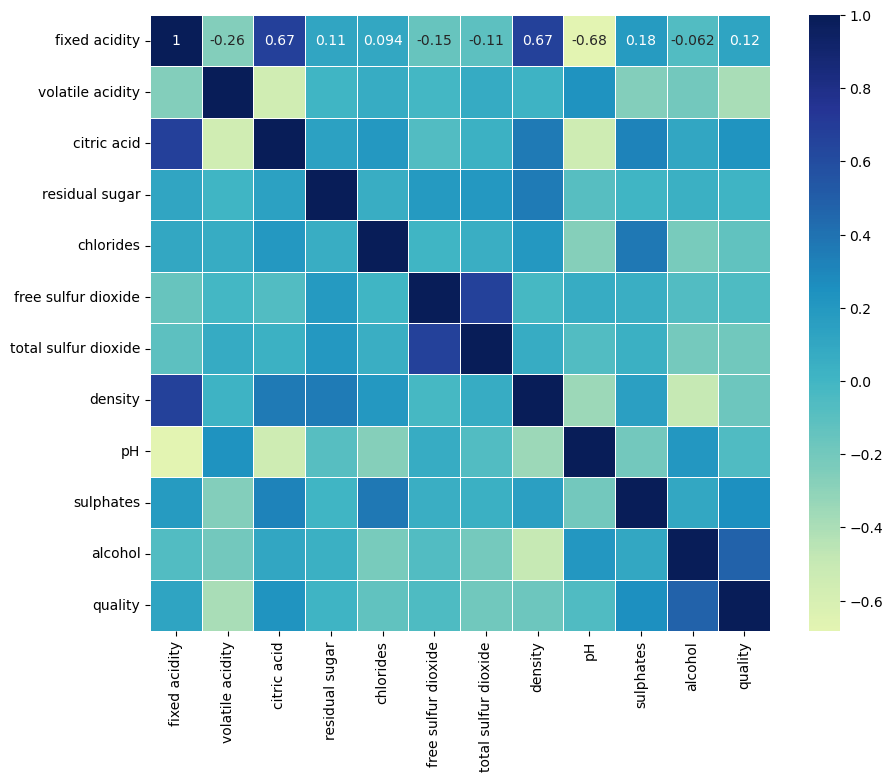

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,lw=.5,center=0,cmap="YlGnBu")

<Axes: title={'center': 'Quality of Wine'}, xlabel='quality'>

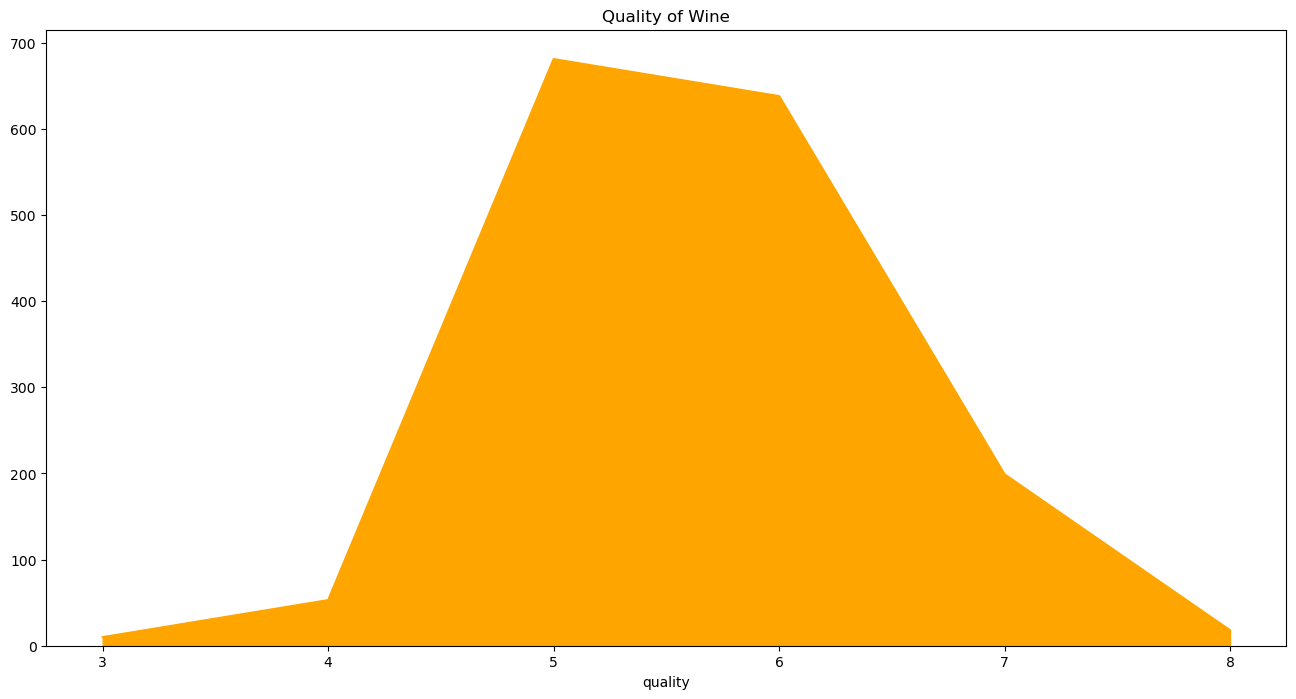

In [36]:
data['quality'].value_counts().sort_index().plot.area(figsize=(16,8),title='Quality of Wine',color='orange')

C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='residual sugar', ylabel='quality'>

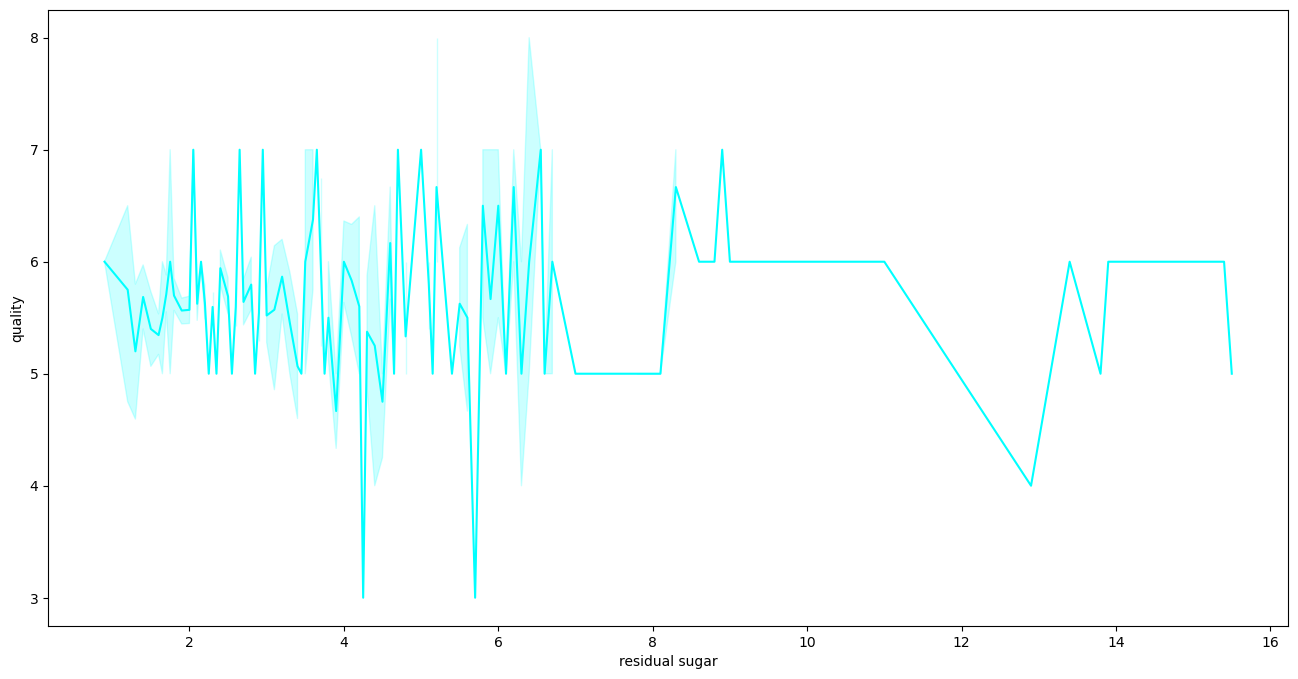

In [37]:
plt.figure(figsize=(16,8))
sns.lineplot(x='residual sugar',y='quality',data=data,color='cyan')

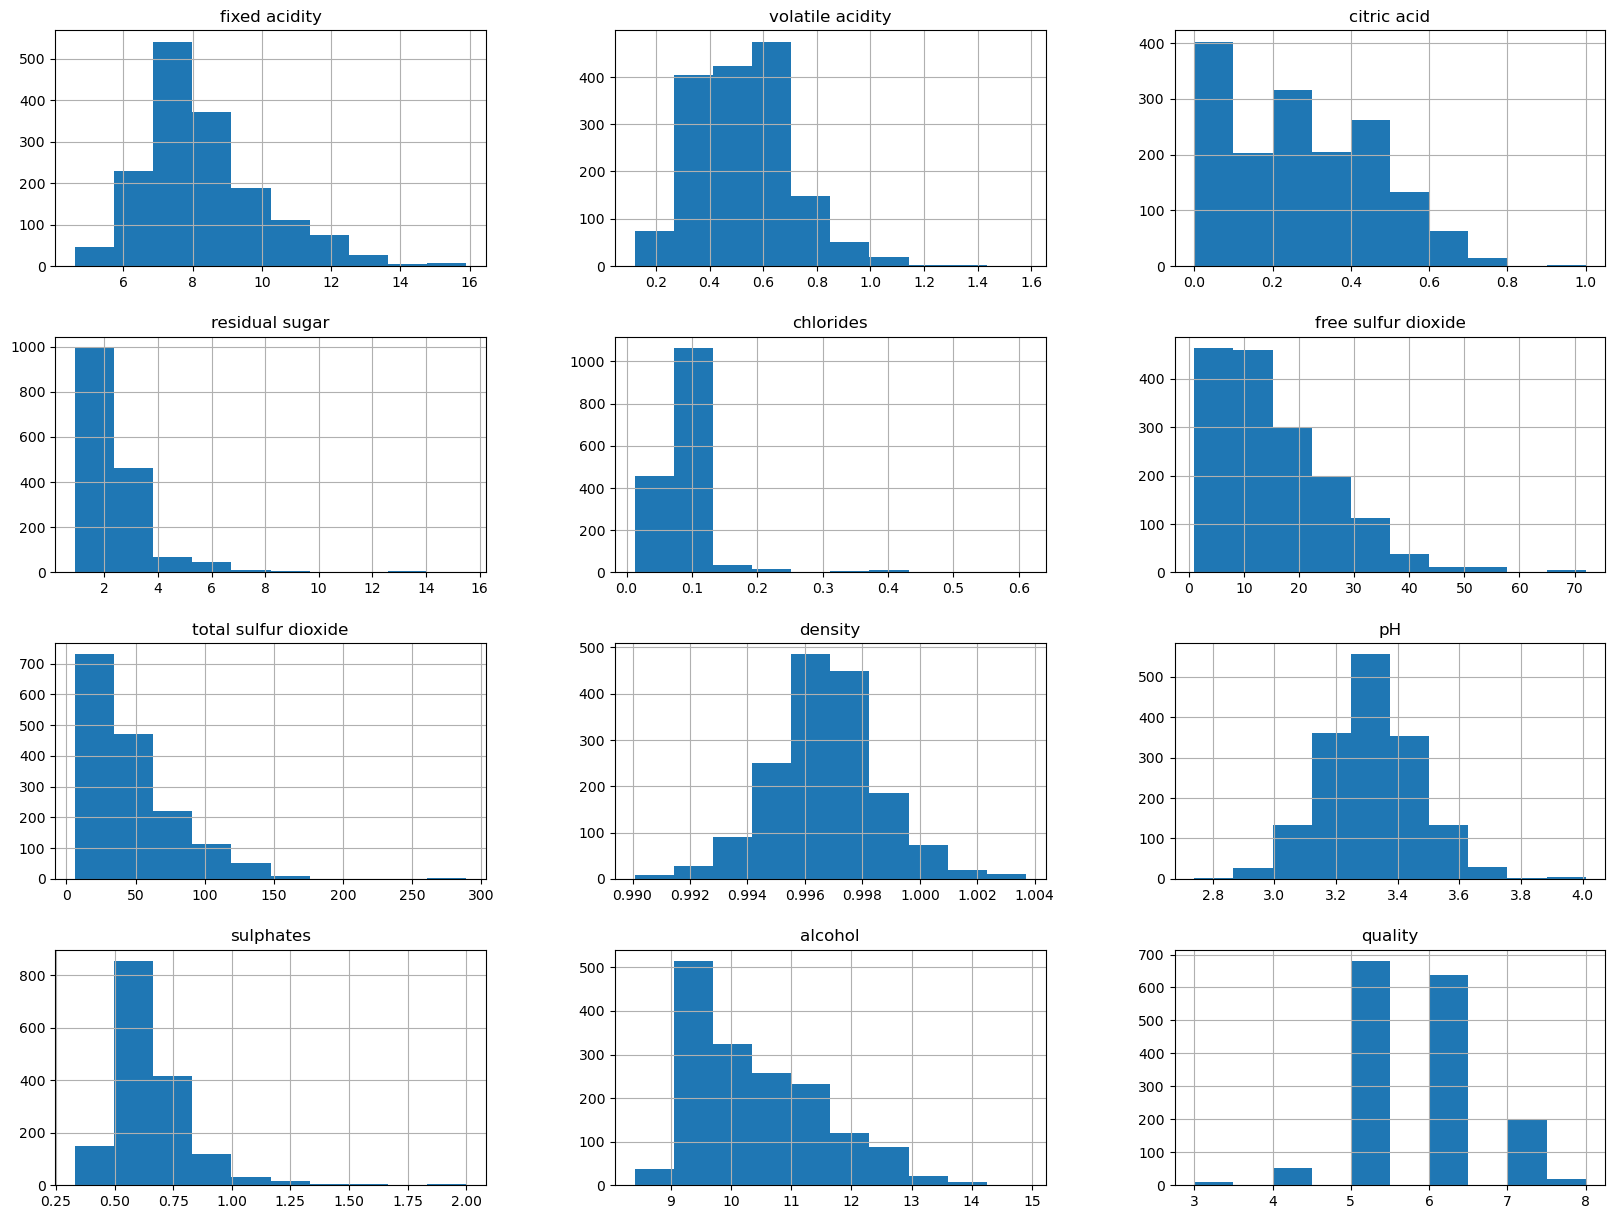

In [38]:
data.hist(figsize=(20,15))
plt.show()

C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

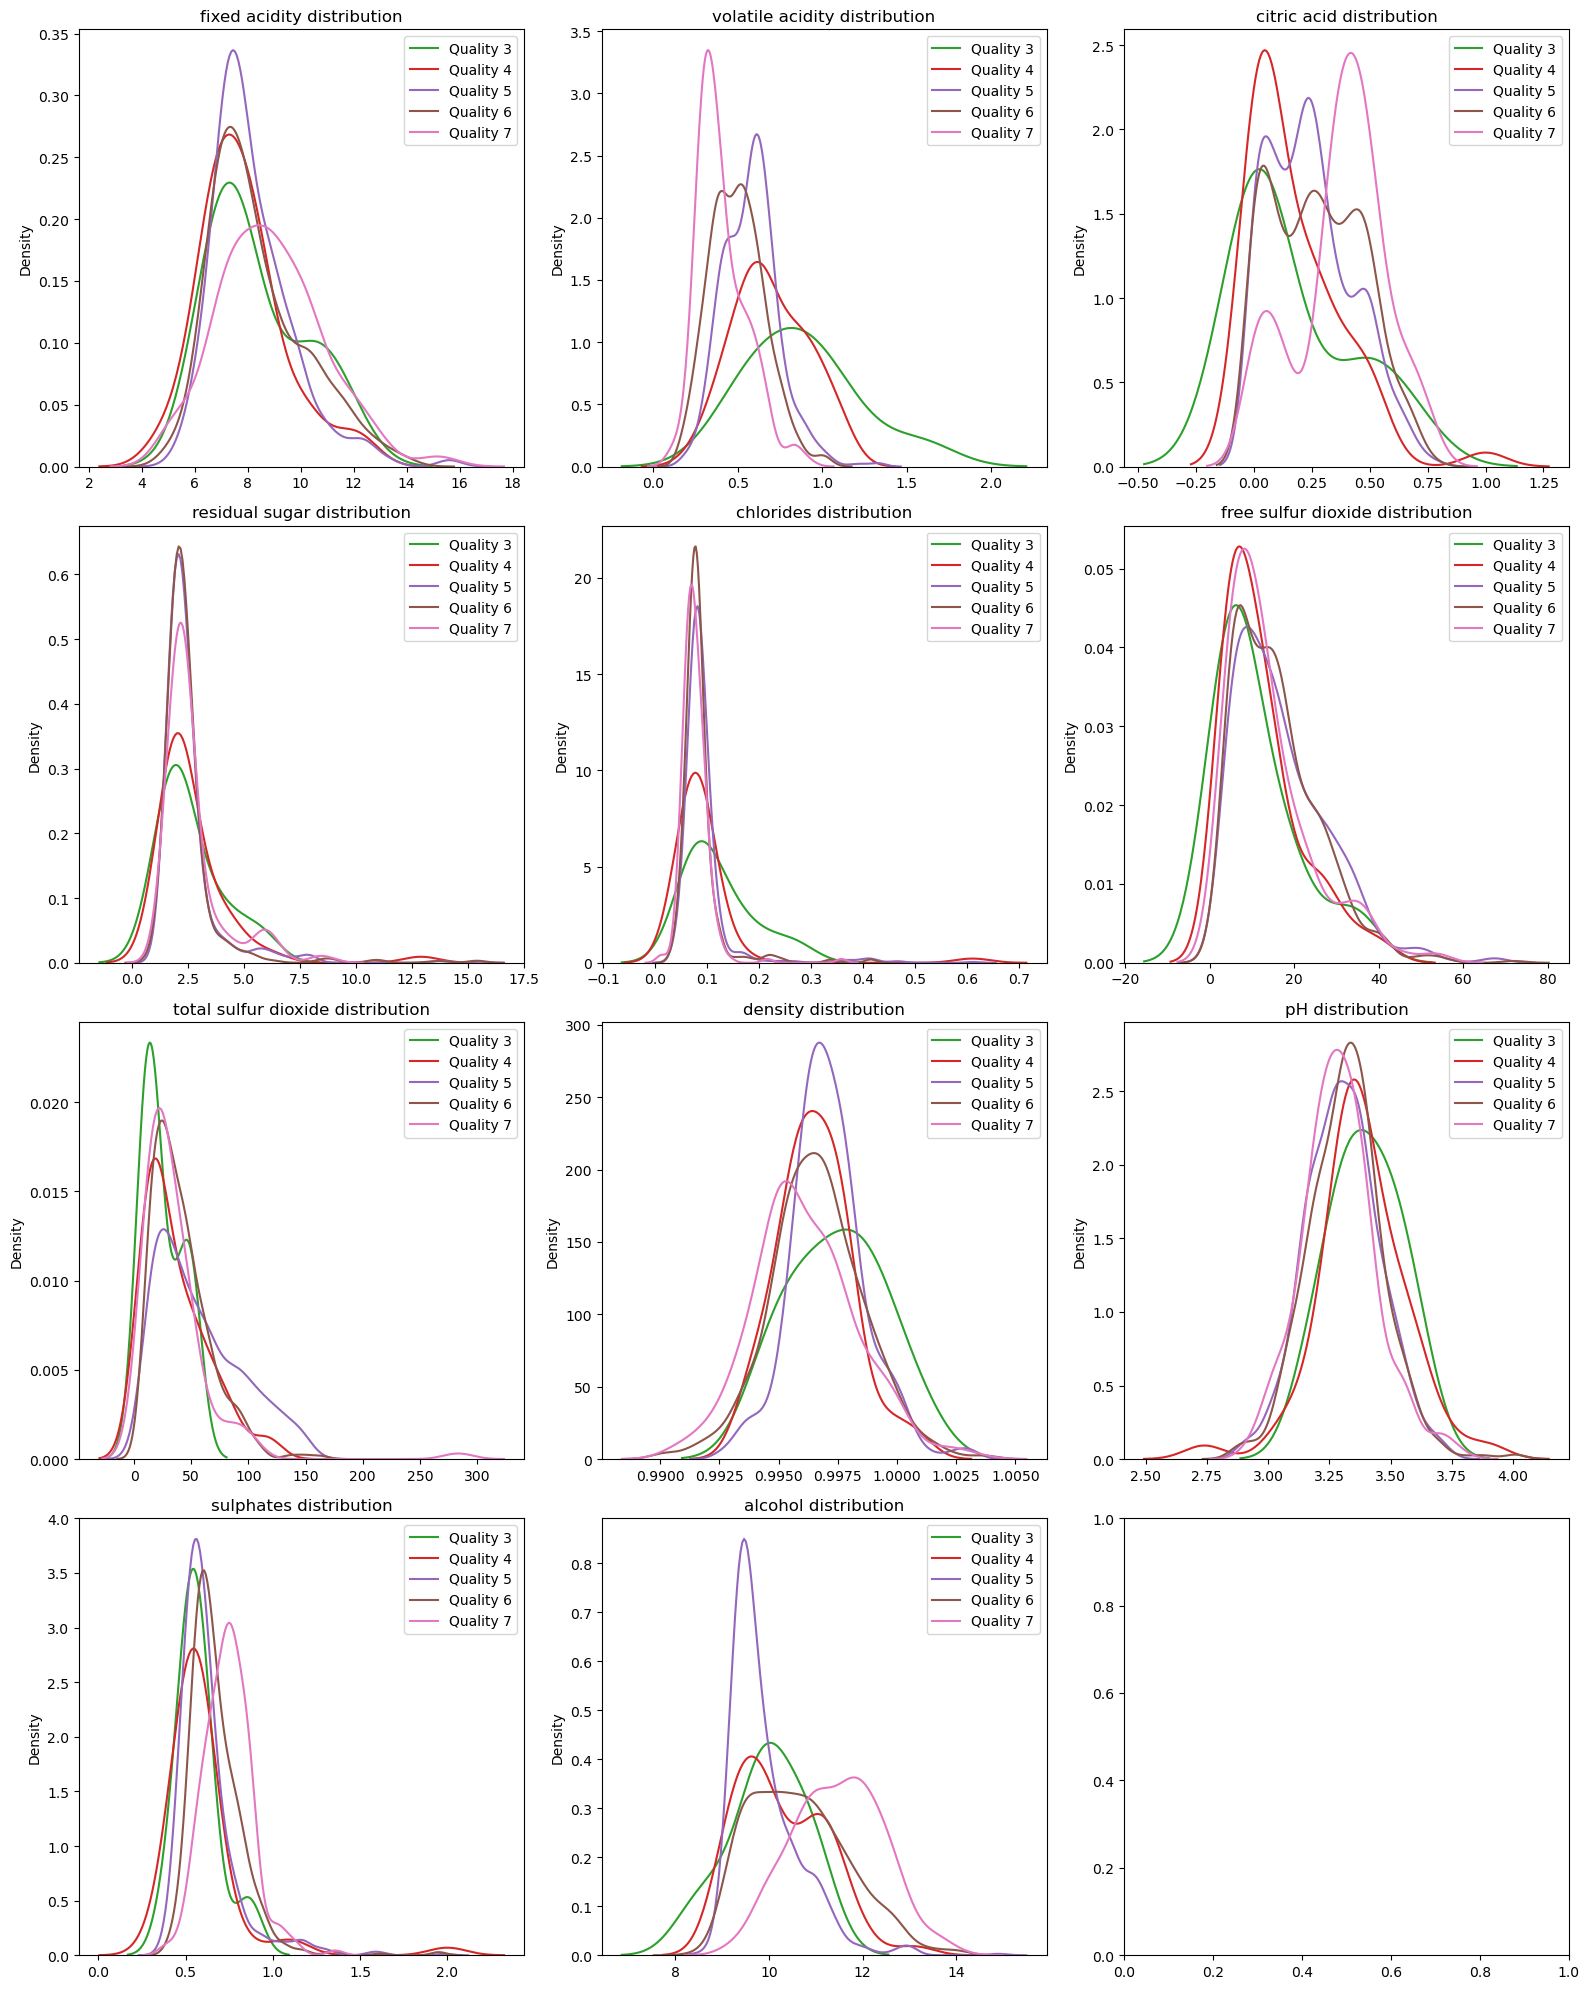

In [39]:

cols_to_draw = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                'pH', 'sulphates', 'alcohol']
cols = 3
rows = int(np.ceil(len(cols_to_draw) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(16, rows * 5))
ax = ax.flatten()

quality_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink']

for x, col in enumerate(cols_to_draw):
    for quality in range(1, 8):
        sns.kdeplot(data=data[data['quality'] == quality][col], ax=ax[x], color=quality_colors[quality - 1],
                    common_norm=False, label=f'Quality {quality}')
    ax[x].set_title(f'{col} distribution')
    ax[x].set_xlabel(None)
    ax[x].legend()

plt.tight_layout()
plt.show()

C:\Users\gauth\AppData\Local\Temp\ipykernel_4592\4045769402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['volatile acidity'],color='red')
C:\Users\gauth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='volatile acidity', ylabel='Density'>

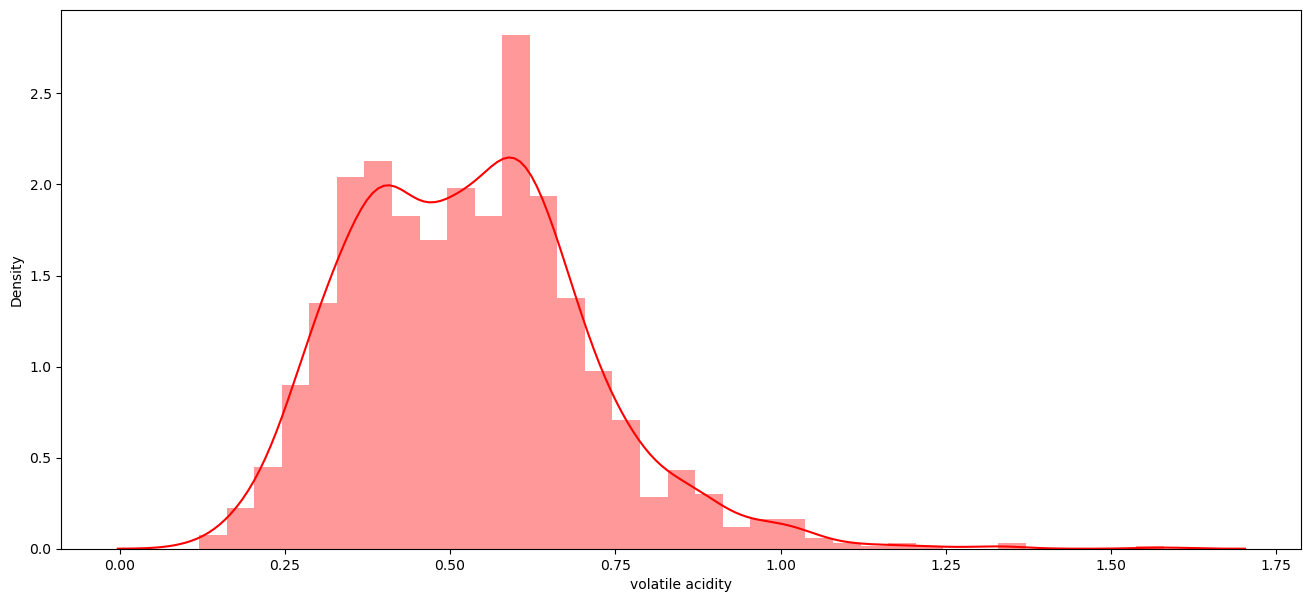

In [40]:
plt.figure(figsize=(16,7))
sns.distplot(data['volatile acidity'],color='red')

Text(0.5, 0, 'Value')

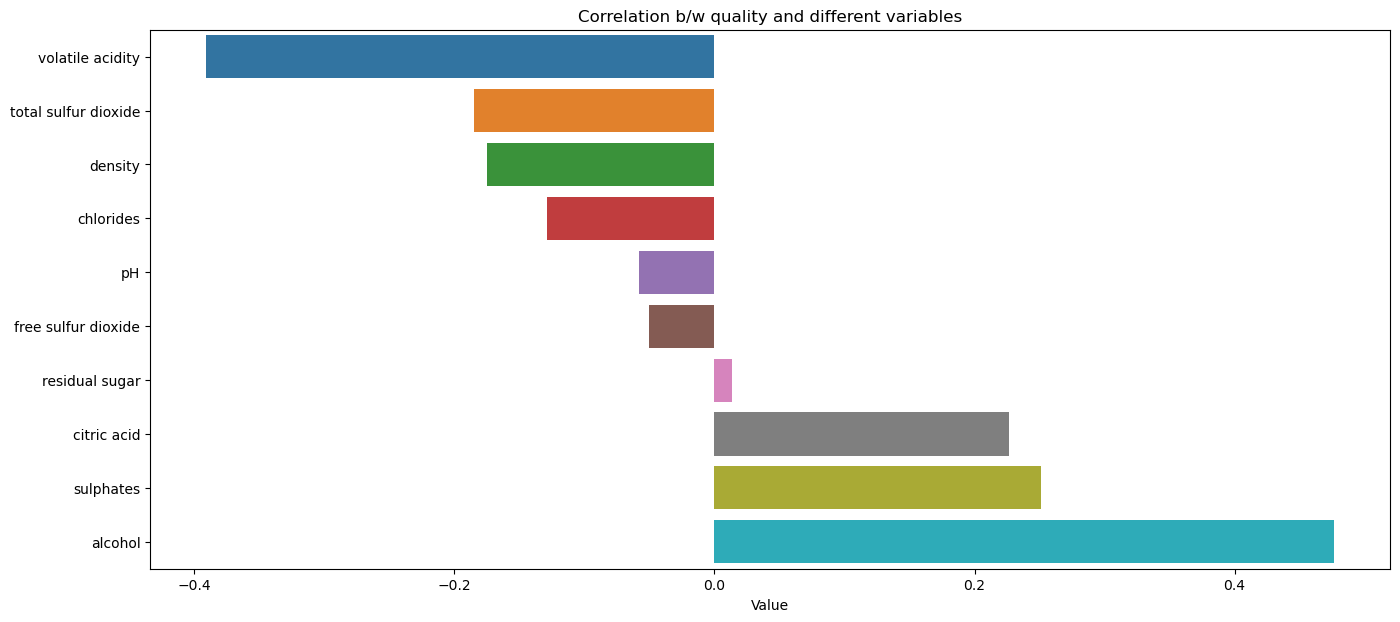

In [41]:
d_corr=data.corr()['quality'][1:].drop('quality',axis=0)

plt.figure(figsize=(16,7))
plt.title('Correlation b/w quality and different variables')
sns.barplot(y=d_corr.sort_values().index,x=d_corr.sort_values().values)
plt.xlabel('Value')


# Outliers

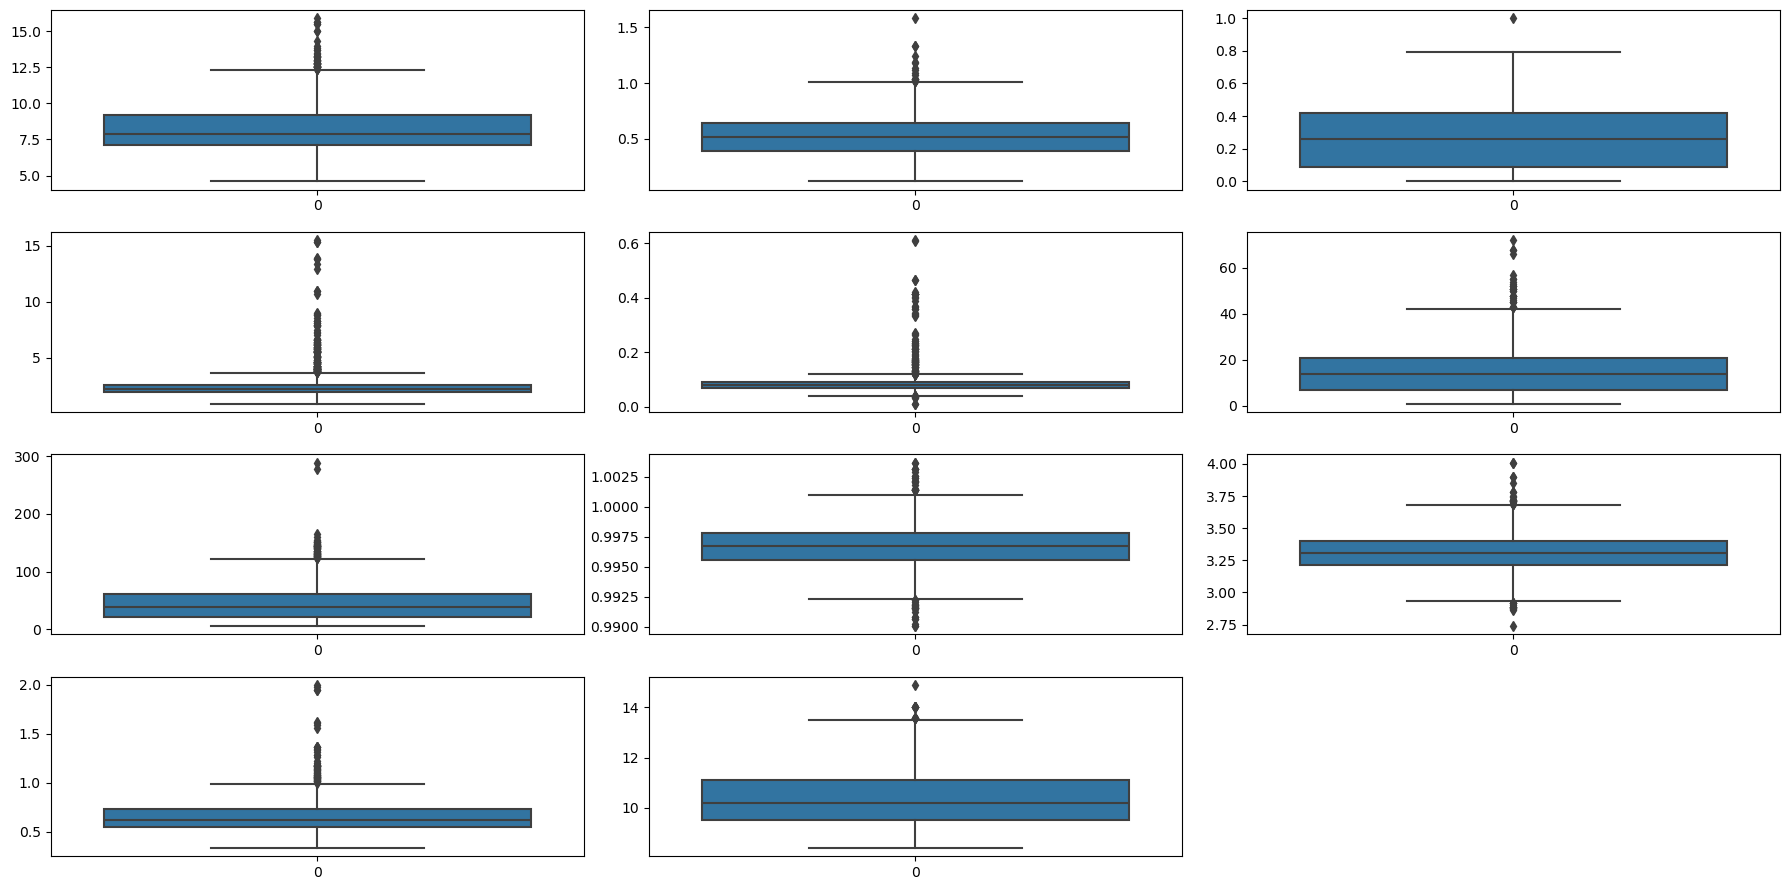

In [42]:
plt.figure(figsize=(18,9))
o_count=1
for i in cols_to_draw:
    plt.subplot(4,3,o_count)
    sns.boxplot(data[i])
    o_count=o_count+1
plt.tight_layout()    

In [43]:
df=data.copy()
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [44]:
df['quality']=df['quality'].map({3:'Bad',4:'Bad',5:'Bad',6:'Good',7:'Good',8:'Good'})
df['quality'].value_counts()

quality
Good    855
Bad     744
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['quality']=le.fit_transform(df['quality'])
df['quality'].value_counts()

quality
1    855
0    744
Name: count, dtype: int64

<Axes: ylabel='count'>

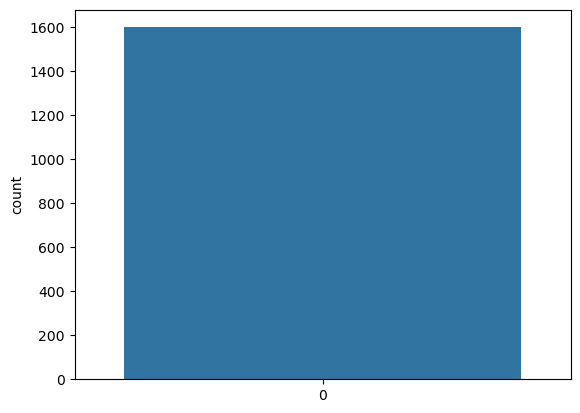

In [46]:
sns.countplot(df.quality)

In [49]:
x=df.drop(['quality'],axis=1)
y=df.quality

In [50]:
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  
0         9.4  
1         9.8  
2         9.8  
3         9.8  
4         9.4  
...       ...  
1594     10.5  
1595     11.2  
1596     11.0  
1597     10.2  
1598     11.0  

[1599 rows x 11 columns]

In [51]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

**Methodology AND Multiple Model Analysis**

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have your data loaded and split into x_train, x_test, y_train, y_test

# Create a list to store results
results_list = []

# Train five different decision tree models
for i in range(1, 11, 2):
    max_depth = i
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    model.fit(x_train, y_train)
    
    # Predictions
    y_train_preds = model.predict(x_train)
    y_test_preds = model.predict(x_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_preds)
    test_accuracy = accuracy_score(y_test, y_test_preds)
    
    # Append results to the list
    results_list.append({'Model': f'Decision Tree {i}', 'Max Depth': max_depth,
                         'Training Accuracy': train_accuracy, 'Testing Accuracy': test_accuracy})

# Create a DataFrame from the list
results_df = pd.DataFrame(results_list)

# Display the results as a table



In [58]:
print(results_df)

             Model  Max Depth  Training Accuracy  Testing Accuracy
0  Decision Tree 1          1           0.704754            0.6900
1  Decision Tree 3          3           0.711426            0.7100
2  Decision Tree 5          5           0.774812            0.7375
3  Decision Tree 7          7           0.844871            0.7050
4  Decision Tree 9          9           0.913261            0.7200


**Conclusion:**
 Decision Tree models with varying Max Depth values demonstrate a trade-off between training accuracy and testing accuracy. A Max Depth of 5 appears to strike a balance, achieving a relatively high testing accuracy of 0.7375. 